# Preprocessing

Tot nu toe hebben we verschillende modellen toegepast op de digits en iris datasets. We hebben daarbij geen preprocessing stappen toegepast, want het was hierbij niet nodig. In sommige gevallen ontkom je er niet aan. Bijvoorbeeld, wanneer verschillende features een verschillende range hebben. Een ander voorbeeld is wanneer je te maken hebt met categorische waardes in je features.

In dit notebook gaan we kijken naar oplossingen voor bovenstaande voorbeelden. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

california = fetch_california_housing()
X, y = california.data, california.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Laten we eerst de verschillende features in de dataset exploreren:

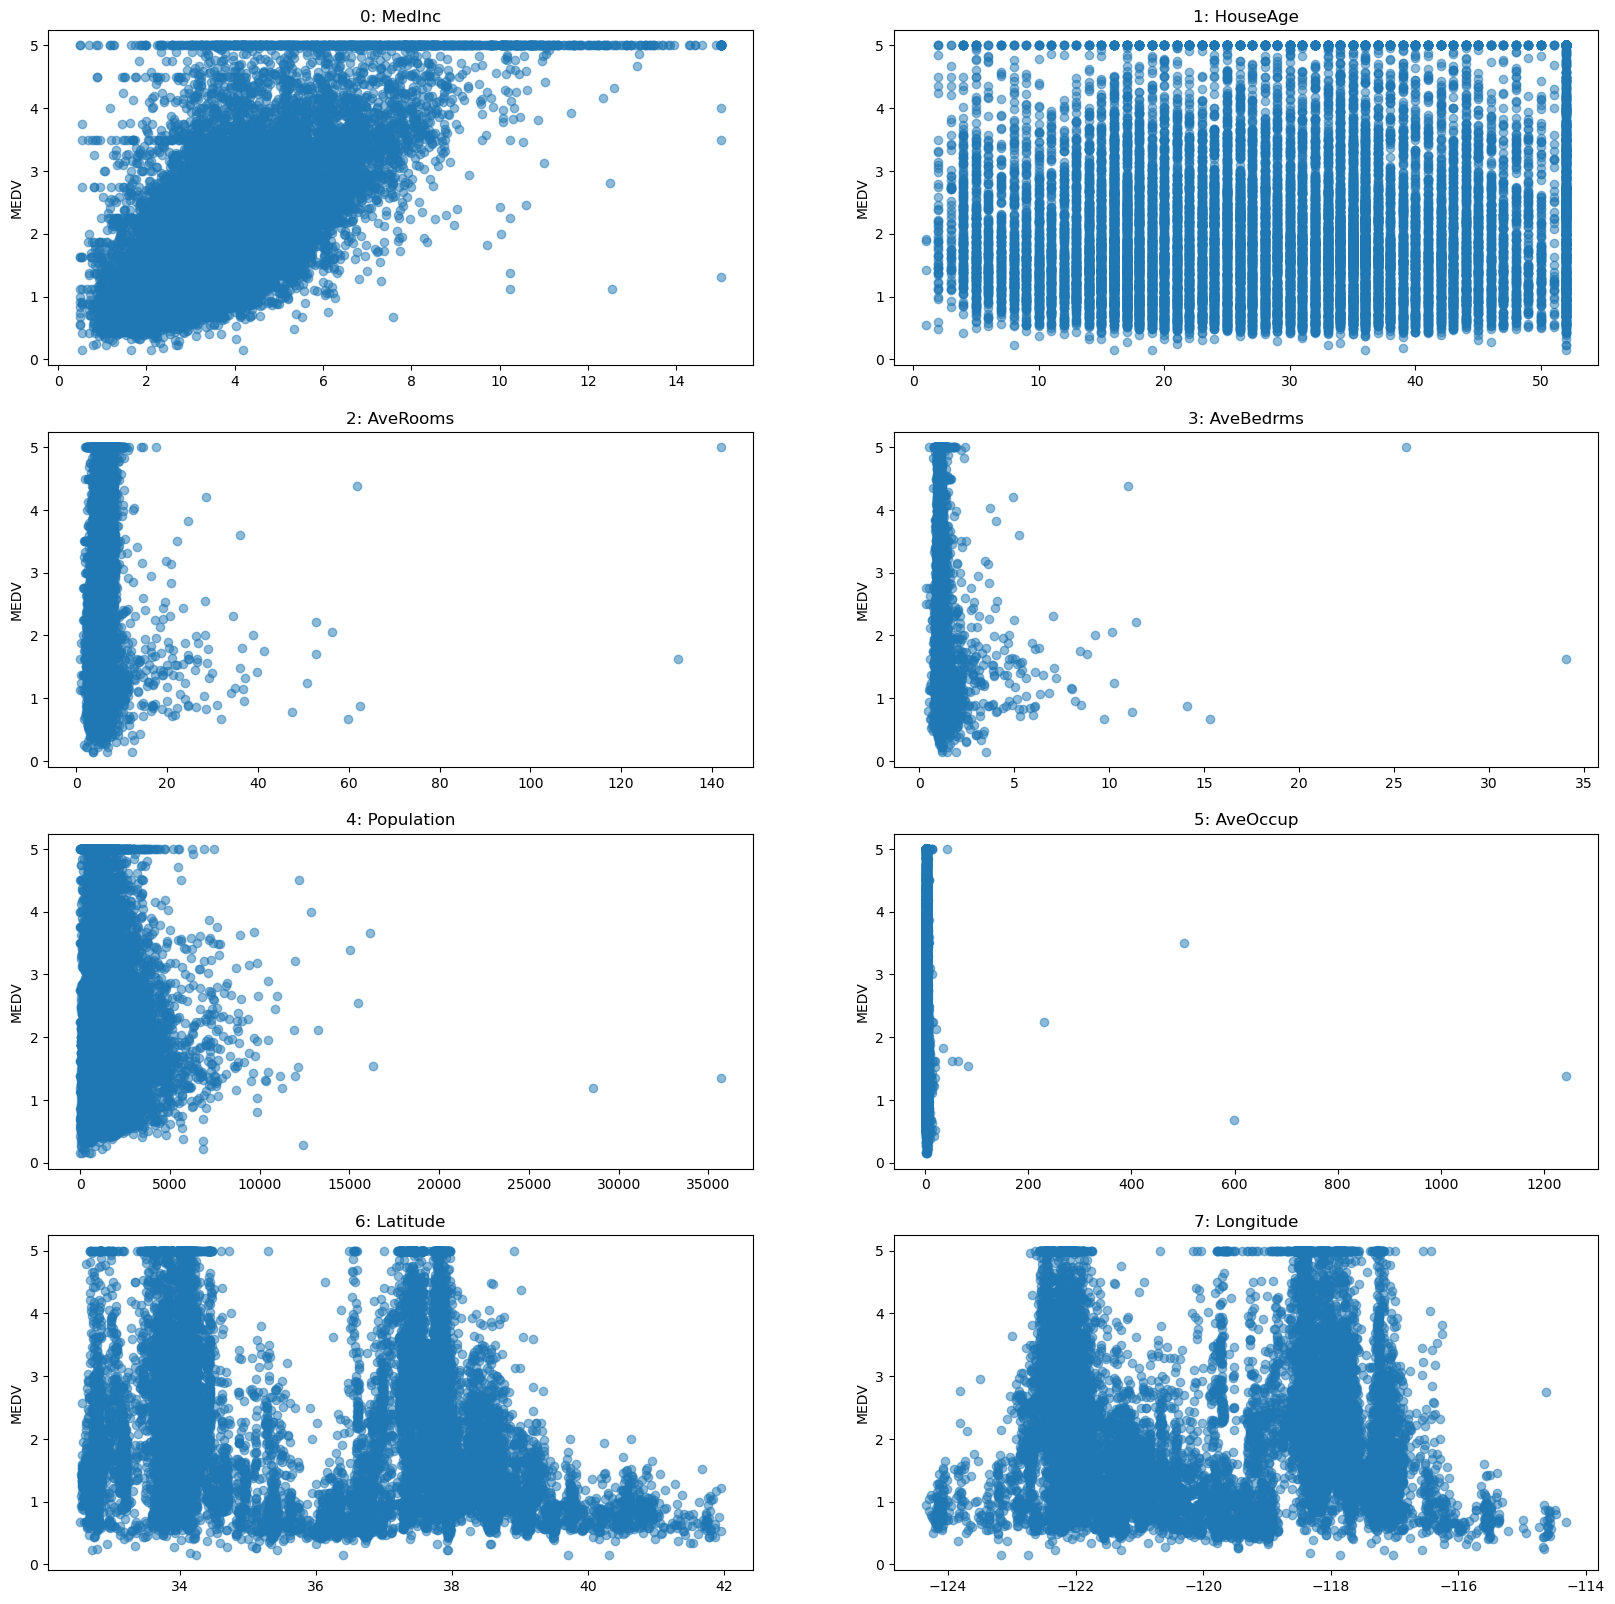

In [3]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, california.feature_names[i]))
    ax.set_ylabel("MEDV")
plt.show()

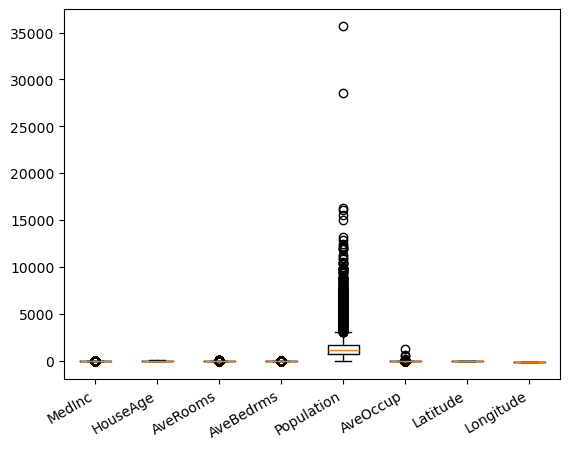

In [4]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), california.feature_names, rotation=30, ha="right");

Zoals hierboven te zien is, hebben sommige features een andere range. 'Population' heeft bijvooebeeld een veel grotere range. Dit kan van invloed zijn op het trainen van je model. Om dit op te lossen kunnen we de waardes van de features schalen m.b.v. de ``StandardScaler``.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

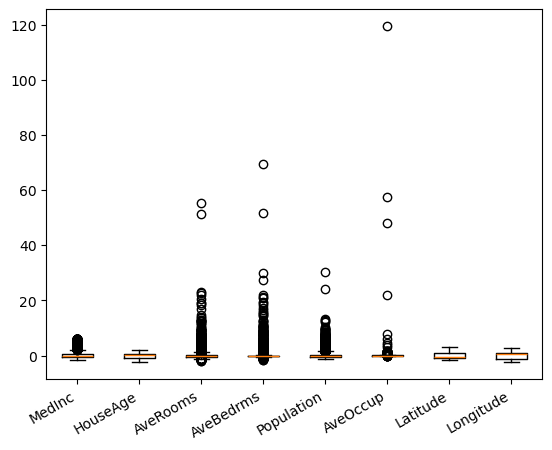

In [6]:
plt.boxplot(X_scaled)
plt.xticks(np.arange(1, X_scaled.shape[1] + 1),
           california.feature_names, rotation=30, ha="right");
plt.show()

Tot nu toe hebben we`` train_test_split`` gebruikt om de data op te splitsen in training en testdatasets. Een robuustere manier is m.b.v. de functie ``cross_val_score``. Deze functie splitst de dataset op in meerdere "folds". Het model wordt meerdere keren getraind en getest, elk keer op een andere subset van de data.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X, y, cv=10)
np.mean(scores), np.std(scores)

(-0.13719490931053405, 0.30678445413592487)

In [8]:
scores = cross_val_score(KNeighborsRegressor(), X_scaled, y, cv=10)
np.mean(scores), np.std(scores)

(0.4792257791733599, 0.1397520645892021)

In [11]:
from sklearn.ensemble import RandomForestRegressor
scores = cross_val_score(RandomForestRegressor(random_state=42), X, y, cv=10)
np.mean(scores), np.std(scores)

(0.6153857947316814, 0.14317639966377935)

In [12]:
from sklearn.ensemble import RandomForestRegressor
scores = cross_val_score(RandomForestRegressor(random_state=42), X_scaled, y, cv=10)
np.mean(scores), np.std(scores)

(0.6152513925499635, 0.14362843475128034)

# Categorische variabelen
Tot nu toe hebben we alleen numerieke waardes gezien in onze features. Het kan echter ook voorkomen dat je categorische waardes hebt. Een manier om hiermee om te gaan is d.m.v. encoding (bijvoorbeeld One Hot Encoding). Er zijn meerdere manieren, hieronder staan twee voorbeelden met de pandas ``get_dummies`` functie en de scikit-learn ``OneHotEncoder``. 

In [18]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,salary,boro
0,103,Manhattan
1,89,Queens
2,142,Manhattan
3,54,Brooklyn
4,63,Brooklyn
5,219,Bronx


In [14]:
pd.get_dummies(df)

,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,False,False,True,False
1,89,False,False,False,True
2,142,False,False,True,False
3,54,False,True,False,False
4,63,False,True,False,False
5,219,True,False,False,False


In [19]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx']})

# Pas OneHotEncoding toe op de 'boro' kolom
encoder = OneHotEncoder(sparse_output=False)
boro_encoded = encoder.fit_transform(df[['boro']])

# Maak een DataFrame van de one-hot encoded kolommen
boro_df = pd.DataFrame(boro_encoded, columns=encoder.get_feature_names_out(['boro']))

# Voeg de one-hot encoded kolommen terug in de originele DataFrame
df_encoded = pd.concat([df.drop('boro', axis=1), boro_df], axis=1)

print(df_encoded)

   salary  boro_Bronx  boro_Brooklyn  boro_Manhattan  boro_Queens
0     103         0.0            0.0             1.0          0.0
1      89         0.0            0.0             0.0          1.0
2     142         0.0            0.0             1.0          0.0
3      54         0.0            1.0             0.0          0.0
4      63         0.0            1.0             0.0          0.0
5     219         1.0            0.0             0.0          0.0


In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Dataset
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Small', 'Large']})

# Toepassing van OrdinalEncoder
encoder = OrdinalEncoder()
encoded = encoder.fit_transform(data[['Size']])

# Combineer met de originele dataset
data['Size_Encoded'] = encoded

print(data)

     Size  Size_Encoded
0   Small           2.0
1  Medium           1.0
2   Large           0.0
3   Small           2.0
4   Large           0.0
